In [87]:
from sklearn.feature_extraction.text import CountVectorizer


In [88]:
allsentences = ["I had pasta for dinner last night, and it was very tasty.",
"The restaurant serves a variety of pasta dishes, and their carbonara is very tasty.",
"She prepared a homemade tomato sauce to go with the pasta, and it turned out very tasty."
]

In [89]:
#create object for count vectorizer
CountVectorizer = CountVectorizer()

X = CountVectorizer.fit_transform(allsentences)

In [90]:
result = X.toarray()
print("Result of Bag of words: \n", result)


Result of Bag of words: 
 [[1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0]
 [1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0]
 [1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1]]


TF-IDF

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [92]:
allsentences = ["I had pasta for dinner last night, and it was very tasty.",
"The restaurant serves a variety of pasta dishes, and their carbonara is very tasty.",
"She prepared a homemade tomato sauce to go with the pasta, and it turned out very tasty."
]

In [93]:
vectorizer = TfidfVectorizer()

#fitvectoriser to all our senetnces
vectors = vectorizer.fit_transform(allsentences)

In [94]:
feature_names = vectorizer.get_feature_names_out()
print(f"Feature names \n{feature_names}")

Feature names 
['and' 'carbonara' 'dinner' 'dishes' 'for' 'go' 'had' 'homemade' 'is' 'it'
 'last' 'night' 'of' 'out' 'pasta' 'prepared' 'restaurant' 'sauce'
 'serves' 'she' 'tasty' 'the' 'their' 'to' 'tomato' 'turned' 'variety'
 'very' 'was' 'with']


In [95]:
matrix = vectors.todense()
denselist = matrix.tolist()

#convert list to dataframe

df = pd.DataFrame(denselist, columns=feature_names)
print(f"Final Result of Tf-Idf \n{df}")

Final Result of Tf-Idf 
        and  carbonara    dinner    dishes       for        go       had  \
0  0.209158   0.000000  0.354136  0.000000  0.354136  0.000000  0.354136   
1  0.187015   0.316644  0.000000  0.316644  0.000000  0.000000  0.000000   
2  0.166704   0.000000  0.000000  0.000000  0.000000  0.282255  0.000000   

   homemade        is        it  ...     tasty       the     their        to  \
0  0.000000  0.000000  0.269329  ...  0.209158  0.000000  0.000000  0.000000   
1  0.000000  0.316644  0.000000  ...  0.187015  0.240816  0.316644  0.000000   
2  0.282255  0.000000  0.214662  ...  0.166704  0.214662  0.000000  0.282255   

     tomato    turned   variety      very       was      with  
0  0.000000  0.000000  0.000000  0.209158  0.354136  0.000000  
1  0.000000  0.000000  0.316644  0.187015  0.000000  0.000000  
2  0.282255  0.282255  0.000000  0.166704  0.000000  0.282255  

[3 rows x 30 columns]


Word2vec

In [96]:
import nltk
import re

In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
#tokenize text og file into sentences
from nltk.tokenize import word_tokenize
#import word2vec class from gensim

In [99]:
from gensim.models import Word2Vec


In [100]:
from sklearn.decomposition import PCA

In [101]:
import matplotlib.pyplot as plt

In [102]:
from nltk.tokenize import sent_tokenize

In [103]:
with open ("word_embed.txt", "r", encoding='utf-8') as txt:
    sentences = txt.readlines()

print(f"Number of sentences {len(sentences)}")

Number of sentences 9


In [104]:
print(sentences)

['The sun was setting over the horizon, casting hues of orange and pink across the sky. Sarah sat on the porch, sipping her tea and enjoying the peaceful evening. She watched as the neighborhood kids played tag in the street, their laughter filling the air. A gentle breeze ruffled the leaves of the trees, carrying the scent of freshly cut grass.\n', '\n', 'In the distance, she could hear the sound of a lawnmower and the faint strains of music from a nearby house. As twilight descended, the stars began to appear one by one, twinkling in the darkness. Sarah sighed contentedly, feeling grateful for the simple joys of life.\n', '\n', 'Inside the house, her cat curled up on the windowsill, purring softly. Sarah smiled at the sight, feeling a sense of warmth and companionship. She thought about all the adventures she and her furry friend had shared over the years.\n', '\n', 'Suddenly, she heard the sound of her phone ringing from inside. With a reluctant sigh, she set down her tea and went t

In [105]:
print(f"First sentence from text file: \n {sentences[0]}")

First sentence from text file: 
 The sun was setting over the horizon, casting hues of orange and pink across the sky. Sarah sat on the porch, sipping her tea and enjoying the peaceful evening. She watched as the neighborhood kids played tag in the street, their laughter filling the air. A gentle breeze ruffled the leaves of the trees, carrying the scent of freshly cut grass.



In [106]:
print(f"First sentence before removing punctuations \n {sentences[0]}")

#removing punctuations

for index in range(len(sentences)):
    sentences[index] = re.sub("[^a-zA-Z]"," ", str(sentences[index]))

print(f"First sentence after removing punctuations \n {sentences[0]}")

First sentence before removing punctuations 
 The sun was setting over the horizon, casting hues of orange and pink across the sky. Sarah sat on the porch, sipping her tea and enjoying the peaceful evening. She watched as the neighborhood kids played tag in the street, their laughter filling the air. A gentle breeze ruffled the leaves of the trees, carrying the scent of freshly cut grass.

First sentence after removing punctuations 
 The sun was setting over the horizon  casting hues of orange and pink across the sky  Sarah sat on the porch  sipping her tea and enjoying the peaceful evening  She watched as the neighborhood kids played tag in the street  their laughter filling the air  A gentle breeze ruffled the leaves of the trees  carrying the scent of freshly cut grass  


In [107]:
#tokenize text of file into sentences

word_tokenizer = []

for sent in sentences:
    word_tokens = word_tokenize(sent)
    word_tokenizer.append(word_tokens)

print(f"First sentence after tokenize \n{word_tokenizer[0]}")

First sentence after tokenize 
['The', 'sun', 'was', 'setting', 'over', 'the', 'horizon', 'casting', 'hues', 'of', 'orange', 'and', 'pink', 'across', 'the', 'sky', 'Sarah', 'sat', 'on', 'the', 'porch', 'sipping', 'her', 'tea', 'and', 'enjoying', 'the', 'peaceful', 'evening', 'She', 'watched', 'as', 'the', 'neighborhood', 'kids', 'played', 'tag', 'in', 'the', 'street', 'their', 'laughter', 'filling', 'the', 'air', 'A', 'gentle', 'breeze', 'ruffled', 'the', 'leaves', 'of', 'the', 'trees', 'carrying', 'the', 'scent', 'of', 'freshly', 'cut', 'grass']


In [108]:
print(word_tokenizer)

[['The', 'sun', 'was', 'setting', 'over', 'the', 'horizon', 'casting', 'hues', 'of', 'orange', 'and', 'pink', 'across', 'the', 'sky', 'Sarah', 'sat', 'on', 'the', 'porch', 'sipping', 'her', 'tea', 'and', 'enjoying', 'the', 'peaceful', 'evening', 'She', 'watched', 'as', 'the', 'neighborhood', 'kids', 'played', 'tag', 'in', 'the', 'street', 'their', 'laughter', 'filling', 'the', 'air', 'A', 'gentle', 'breeze', 'ruffled', 'the', 'leaves', 'of', 'the', 'trees', 'carrying', 'the', 'scent', 'of', 'freshly', 'cut', 'grass'], [], ['In', 'the', 'distance', 'she', 'could', 'hear', 'the', 'sound', 'of', 'a', 'lawnmower', 'and', 'the', 'faint', 'strains', 'of', 'music', 'from', 'a', 'nearby', 'house', 'As', 'twilight', 'descended', 'the', 'stars', 'began', 'to', 'appear', 'one', 'by', 'one', 'twinkling', 'in', 'the', 'darkness', 'Sarah', 'sighed', 'contentedly', 'feeling', 'grateful', 'for', 'the', 'simple', 'joys', 'of', 'life'], [], ['Inside', 'the', 'house', 'her', 'cat', 'curled', 'up', 'on', 

In [109]:
model_cbow = Word2Vec(sentences=word_tokenizer,
                vector_size=2,
                window=2,
                min_count=2,
                workers=1,
                sg=0
                )

#total vocabulary words for word 2 vec model
words_cbow = list(model_cbow.wv.key_to_index.keys())
print(f"Total number of words {len(words_cbow)}")

Total number of words 32


In [110]:
print(words_cbow)

['the', 'of', 'and', 'her', 'she', 'to', 'a', 'Sarah', 'was', 'for', 'over', 'in', 'sound', 'tea', 'evening', 'She', 'on', 'be', 'moment', 'from', 'house', 'As', 'one', 'feeling', 'up', 'at', 'sense', 'adventures', 'friend', 'phone', 'down', 'The']


In [114]:
#we can get word embedding value for a particular word
model_cbow.wv.__getitem__('evening')

array([-0.37792143, -0.1965101 ], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

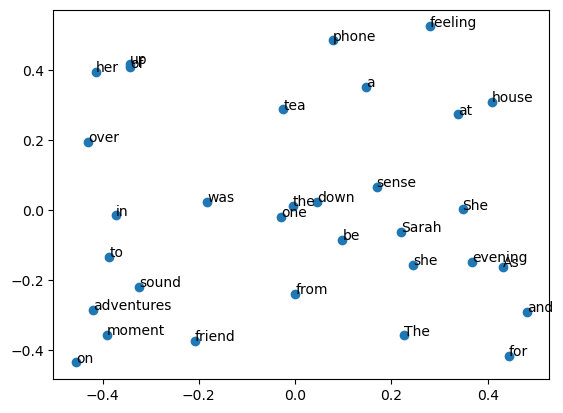

In [115]:
X = model_cbow.wv.__getitem__(model_cbow.wv.key_to_index.keys())

#create 2D model using PCA

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

#visualize pca model using matplotlib
plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.key_to_index.keys())
for i, word in enumerate(words_cbow[:100]):
    plt.annotate(text=word, xy=(result[i,0], result[i,1]))
plt.show

In [116]:
model_skip = Word2Vec(sentences=word_tokenizer,
                vector_size=2,
                window=2,
                min_count=4,
                workers=1,
                sg=1
                )

# total vocabulary words for word 2 vec model
words = list(model_skip.wv.key_to_index.keys())
print(f"Total number of words {len(words)}")

Total number of words 9


In [117]:
print(words)

['the', 'of', 'her', 'and', 'she', 'to', 'a', 'Sarah', 'was']


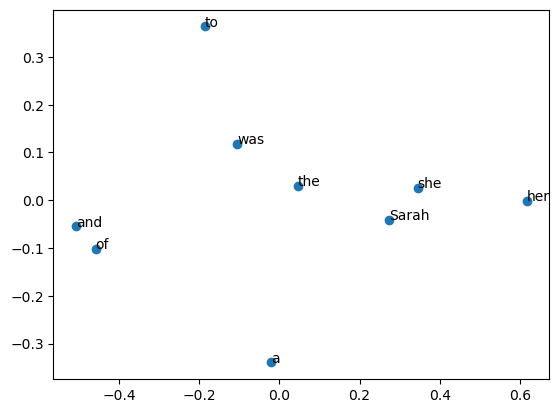

In [126]:
X = model_skip.wv.__getitem__(model_skip.wv.key_to_index.keys())

# create 2D model using PCA
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

#vizualize pca model using matplotlib
plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.key_to_index.keys())
for i, word in enumerate(words_skip[:100]):
    plt.annotate(text=word, xy=(result[i,0], result[i,1]))
plt.show()

Google Word2Vec

In [128]:
from gensim.models import KeyedVectors
filename = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [130]:
#just predict or word from king-man+woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"Result ? mark in the following sentence King - man = ? - woman : - {result}")

Result ? mark in the following sentence King - man = ? - woman : - [('queen', 0.7118192911148071)]


Stanford Glove Embeddings

In [131]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
input_file = "glove.6B.100d.txt"
output_file = "glove.6B.100d.txt.word2vec"

#convert input file to word2vec format using glove2word2vec function
glove2word2vec(input_file, word2vec_output_file=output_file)

model = KeyedVectors.load_word2vec_format(output_file, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"Result : - {result}")

C:\Users\moon\AppData\Local\Temp\ipykernel_9264\2119856811.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(input_file, word2vec_output_file=output_file)


Result : - [('queen', 0.7698540687561035)]


: 